# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [18]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [20]:
apple=data

### Step 4.  Check out the type of the columns

In [21]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [22]:
apple['Date'] = pd.to_datetime(apple['Date'])
print(apple['Date'].dtype)

datetime64[ns]


### Step 6.  Set the date as the index

In [23]:
apple.set_index('Date', inplace=True)
print(apple.head())

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52


### Step 7.  Is there any duplicate dates?

In [24]:
print(apple.index.is_unique)

True


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [25]:
apple.sort_index(inplace=True)
print(apple.head())

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41


### Step 9. Get the last business day of each month

In [26]:
#년, 월 칼럼을 생성함
apple['Year'] = apple.index.year
apple['Month'] = apple.index.month

#년, 월별로 그룹화해서 가장 최댓값(위에서 날짜를 오름차순으로 정렬했음)을 가지는 인덱스를 찾음
last_day_index = apple.groupby(['Year', 'Month']).apply(lambda x: x.index.max())

#해당되는 행들을 추출함
last_day = apple.loc[last_day_index]

#임시로 만들었던 년, 월 칼럼을 제거함
last_day = last_day.drop(columns=['Year', 'Month'])

print(last_day.head())




             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-30  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-27  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44


/tmp/ipython-input-2546044093.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_day_index = apple.groupby(['Year', 'Month']).apply(lambda x: x.index.max())


In [27]:
apple_last_bd = apple.resample('BM').last()
print(apple_last_bd)

              Open    High     Low   Close     Volume  Adj Close  Year  Month
Date                                                                         
1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53  1980     12
1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44  1981      1
1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41  1981      2
1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38  1981      3
1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44  1981      4
...            ...     ...     ...     ...        ...        ...   ...    ...
2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25  2014      3
2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83  2014      4
2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43  2014      5
2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93  2014      6
2014-07-31   96.27   96.80   93.92   95.35   65130000      95.35

/tmp/ipython-input-3005681802.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_last_bd = apple.resample('BM').last()


### Step 10.  What is the difference in days between the first day and the oldest

In [28]:
diff = apple.index.max() - apple.index.min()
print(diff)

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [29]:
#'M'을 이용해서 월 마지막 날만 뽑아서 수를 셈
n_months = apple.index.to_period('M').nunique()
print(n_months)

404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

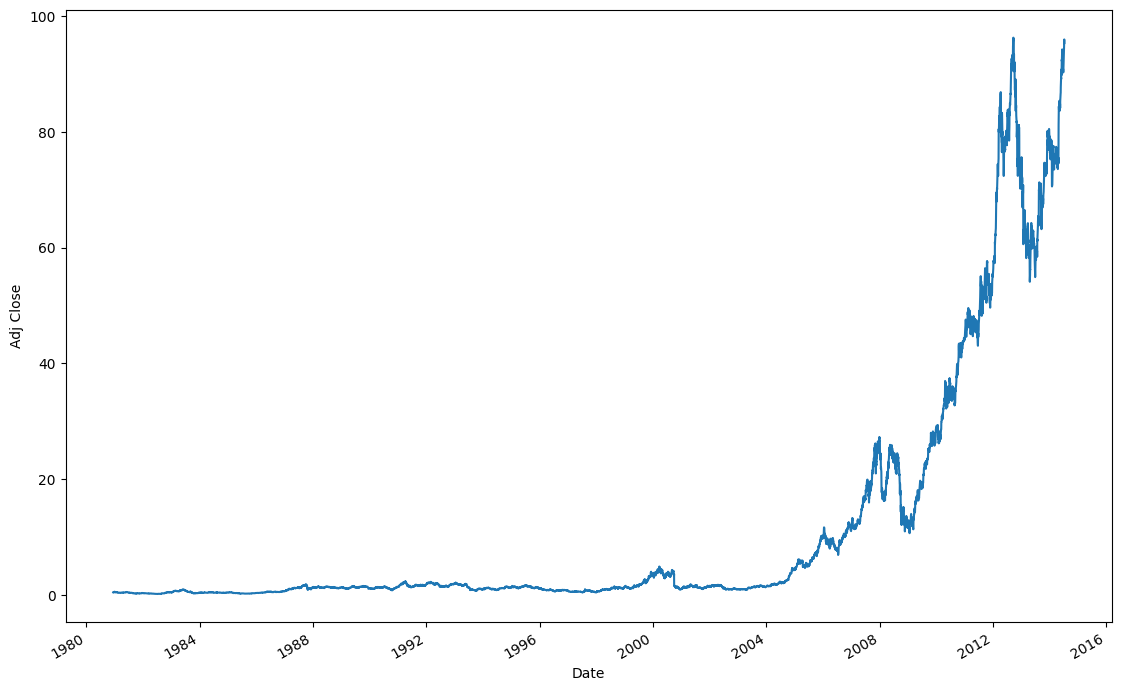

In [30]:
import matplotlib.pyplot as plt

# figure의 크기 설정
plt.figure(figsize=(13.5, 9))

# 날짜가 x축 'Adj Close'가 y축이 되는 그래프를 그림
apple['Adj Close'].plot()

plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()